# Clasificación Automática de Imágenes con Redes Neuronales
Por José Pablo Jiménez

IMPORTANTE: Encender el GPU en Edit > Notebook Settings > Hardware Accelerator. 

El dataset se puede descargar de Kaggle en este link - https://www.kaggle.com/slothkong/10-monkey-species

Este código se desarrolló usando FASTAI. Recomiendo entrar en el link de FASTAI y hacer los cursos - 
https://www.fast.ai/



## Instrucciones Generales

### FASTAI v1.0 

Primeramente, vamos a correr la instrucción de abajo para instalar Pytorch 1.4, el cual es compatible con FASTAI v1.


IMPORTANTE - todos los comandos que se corren con el signo de admiración al inicio, son comandos de consola, es decir instalaciones, copia de archivos, etc. 

In [1]:
!pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 38.5MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


### Opciones de Jupyter Notebook

Las siguientes instrucciones, y todas aquellas que comiencen con el signo de porcentage, son para la configuración del cuaderno. En este caso estas tres instrucciones indican cada cuando actualizar el cuaderno y además de poner los gráficos de matplotlib en línea (no en una ventana flotante). 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Importar Librerías

Vamos a utilizar dos - FASTAI y Google Colab. 
A diferencia de las mejores prácticas en programación general, es común ver import * en Jupyter Notebooks de este tipo - más orientados a investigación y pruebas. 
No incide en problemas notables de rendimiento. 

In [0]:
from fastai.vision import *
from google.colab import drive

### Configurar Google Drive

Con el código de abajo podemos sincronizar Google Drive con Google Colab. 

In [4]:
drive.mount("onedrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at onedrive


## Datos 


### Copiando el dataset de OneDrive a Colab

Empezamos por mover el zip con las fotos a Google Colab - esto va a lograr que todo el código de abajo se ejecute mucho más rápido. 

In [0]:
!unzip -q "/content/onedrive/My Drive/datasets/10-monkeys/10-monkey-species.zip" -d "/content/"

### Creando el dataset

Se empieza por configurar la variable path, para luego definir transformaciones y finalmente crear la variable data usando el Data Block API de FASTAI. 

In [0]:
path = Path("/content/10-monkey-species")

Opciones - 


*   do_flip - flip horizontal
*   flip_vert - flip vertical
*   max_rotate - rotar la imagen
*   max_zoom - zoom la imagen
*   max_lighting - iluminar la imagen
*   max_warp - deformar la imagen
*   p_affine - probabilidad de hacer modificaciones (excepto iluminación)
*   p_lighting - probablidad de hacer modificaciones de iluminación

Si no especificamos todas las opciones, FASTAI las opciones por defecto. 



In [0]:
transformations = get_transforms(do_flip=True, 
                                 flip_vert=False,
                                 max_rotate=10, 
                                 max_zoom=0.1, 
                                 max_lighting=0.4, 
                                 max_warp=0.2,
                                 p_affine=.3, 
                                 p_lighting=.3)

El flujo del data block de FASTAI es - 
1. ¿De dónde obtengo los datos?
2. ¿Cómo divido los datos en training y validation sets?
3. ¿cómo etiqueto los datos?
4. Opciones de transformación de datos
5. Opciones de databunch - particularmente batch size
6. Opciones de normalización

Existen opciones simplificadas para imágenes como el ImageDataBunch, pero creo importante entender y usar el data block. 

In [0]:
data = (ImageList.from_folder(path)
        .split_by_folder(train="training", valid="validation")
        .label_from_folder()
        #.transform(get_transforms(),size=224) #Si no declaramos transformaciones con este código usamos los defaults. 
        .transform(transformations, size=224, padding_mode="border")
        .databunch(bs=64)
        .normalize(imagenet_stats)
        )

### Verificando el dataset

Es importante verificar al menos varias de las imágenes, asegurarnos de que las clases coinciden con lo que se espera y validar si las tranformaciones dan resultados que consideramos positivos. 

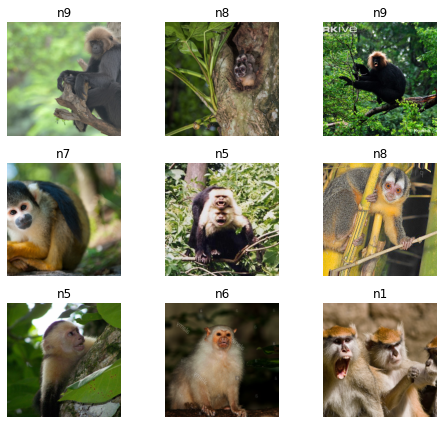

In [18]:
data.show_batch(rows=3, figsize=(7,6))

In [19]:
data.classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [20]:
data.c

10

## Red Neuronal

Abajo la definición del cerebro de nuestro modelo. Esta es la estructura que permite aprender. 


In [0]:
rn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [22]:
rn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

## Entrenamiento 



### Velocidad de entrenamiento

Ahora los datos están listos y el modelo también. Únicamente nos falta entrenar al robot para que aprenda a diferenciar entre las distintas especies. 

Utilizamos el método fit_one_cycle especicando la cantidad de épocas y la velocidad de entrenamiento. 

In [0]:
lr = 1e-3

In [23]:
rn.fit_one_cycle(3, lr)
rn.save("version1")
!cp -v {path}/"models/version1.pth" "/content/onedrive/My Drive/models/10-monkeys"

epoch,train_loss,valid_loss,accuracy,time
0,2.300220,0.157046,0.959559,01:06
1,1.114481,0.042665,0.988971,01:07
2,0.678431,0.036625,0.988971,01:07


'/content/10-monkey-species/models/version1.pth' -> '/content/onedrive/My Drive/models/10-monkeys/version1.pth'


### Salvar vs. Exportar

FASTAI te da dos opciones básicas - 

1. Salvar el modelo. 

Esto permite guardar los "pesos" (o más correctametne dicho, los paràmetros) que se calculan como resultado del entrenamiento. Esta función crea un folder llamado "models" bajo la ruta definida (path). Toma como parámetro el nombre del archivo, y le asigna el formato pth. Para usar un modelo previamente salvado hay que seguir todos los pasos anteriores - importar las librerías, cargas los datos, crear la red neuronal y finalmente usar la función .load para cargar. 

La utilidad de salvar es poder seguir el proceso de entrenamiento sin tener que re-entrenar el modelo desde cero, considerando que es común que fit_one_cycle puede tomar horas en terminar. 


In [24]:
rn.save("modelo-v1")
!cp -v {path}/"models/modelo-v1.pth" "/content/onedrive/My Drive/models/10-monkeys"

'/content/10-monkey-species/models/modelo-v1.pth' -> '/content/onedrive/My Drive/models/10-monkeys/modelo-v1.pth'


2. Exportar el modelo

Esto se hace cuando estamos satisfechos con el modelo tal y como está. Exportar permite crear el archivo "export.pkl" bajo la ruta (path). 

Este archivo puede ser utilizado después para cargar los datos e inferir. 

In [26]:
red.export()
!cp -v {path}/"export.pkl" "/content/onedrive/My Drive/models/10-monkeys"

'/content/10-monkey-species/export.pkl' -> '/content/onedrive/My Drive/models/10-monkeys/export.pkl'


## Pruebas 

El código de abajo fue creado específicamente para asignar los nombres en español para las distiantas categorías de monos. 

In [0]:
def tipoMono(t):
  switcher = {
     "n0": "Mono Aullador",
     "n1": "Mono Patas",
     "n2": "Mono Ucarí Calvo",
     "n3": "Macaco Japonés",
     "n4": "Mono Tití Pigmeo",
     "n5": "Mono Carablanca",
     "n6": "Mono Tití Plateado",
     "n7": "Mono Ardilla Común",
     "n8": "Mico Nortuno de Cabeza Negra",
     "n9": "Mono Langur de Nilgiri",
      }
  return switcher.get(t,"Ni idea!")

### Cargar la imagen

Cargamos una imagen de prueba - es una línea de código pero ponemos dos para mostrar la imagen en línea.

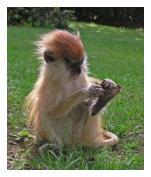

In [28]:
img = open_image("/content/onedrive/My Drive/images/monos/mono-patas.jpeg")
img.show()
#img.px

### Cargamos el modelo 

Usando load_learner ponemos un URL que contenga el archivo llamado "export.pkl". Luego utilizamos el método .predict para hacer la predicción. 
Finalmente, como paso opcional usamos el código que hicimos para mostrar el nombre en español. 

In [0]:
covi = load_learner("/content/onedrive/My Drive/models/10-monkeys")

In [31]:
tipo,_,_ = covi.predict(img)
tipo, tipo.obj

(Category tensor(1), 'n1')

In [32]:
tipoMono(tipo.obj)

'Mono Patas'